# Set up

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as pl, scipy.sparse as ssp
import scanpy as sc,scanpy.external as sce
import os
import sys
sys.path.append('/Users/kalki/Dropbox (HMS)/PhD_lab/SPRING_dev/data_prep/')
import helper_functions_py3 as hf

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100)  # low dpi (dots per inch) yields small inline figures


import statsmodels.formula.api as smf 
import statsmodels.api as sm
import seaborn as sn
from collections import Counter
import scipy.stats as ss

# Load data

## Reference data

In [4]:
# concatenate anndata from different time points:

adata_indrops4c = sc.read('../../../../3.Indrops4/data/anndata_objects/adata_indrops4_all.h5ad')

sc.pp.normalize_per_cell(adata_indrops4c, counts_per_cell_after=10000)


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [5]:
adata_indrops4c_24 = adata_indrops4c[adata_indrops4c.obs.time_point == '24'].copy()

In [6]:
# reannoate states with time point labels on the state labels:

states_indrops4c = np.array(adata_indrops4c.obs.cell_states)
for i,states in enumerate(states_indrops4c):
    if np.array(adata_indrops4c.obs.time_point)[i] == '14':
        states_indrops4c[i] = '14-'+states
    if np.array(adata_indrops4c.obs.time_point)[i] == '21':
        states_indrops4c[i] = '21-'+states
    if np.array(adata_indrops4c.obs.time_point)[i] == '18':
        states_indrops4c[i] = '18-'+states
    if np.array(adata_indrops4c.obs.time_point)[i] == '24':
        states_indrops4c[i] = '24-'+states

In [7]:
# number of cells in different time points in reference data
tp_sizes = np.array([(adata_indrops4c.obs.time_point == '14').sum(),
            (adata_indrops4c.obs.time_point == '18').sum(),
            (adata_indrops4c.obs.time_point == '21').sum(),
            (adata_indrops4c.obs.time_point == '24').sum()])

## Test data

In [8]:
# load test data: 24 hpf data:
adata24 = sc.read_h5ad('../../../data/anndata_objects/adata24_perturbations.h5ad')
sc.pp.normalize_per_cell(adata24, counts_per_cell_after=10000)

adata24c = adata24[adata24.obs.treatment == 'control'].copy()
adata24h = adata24[adata24.obs.treatment == 'hua'].copy()
adata24e = adata24[adata24.obs.treatment == 'emi'].copy()

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


# Classify data

In [9]:
cc_genes_dan = ['cdk1','mcm2','mcm7','rrm2','cenpa', 'cdc6', 'ccnf', 'cdca4','ccnd1', 'kif4']

house_keeping = ['hmgb1b', 'hmgb3a', 'hspd1', 'hspa9', 'rplp0', 'hnrnpaba', 'rps2',
                  'rps12', 'rpl12', 'rps13', 'rps14', 'rps15a','rpl10', 'rps3a', 
                  'rpl31', 'rpl37', 'rps6', 'rpl9', 'rpl11', 'rpl34', 'rpl13', 
                  'rpl36a', 'rpl26', 'rps8a', 'rpl21','rps27.1','rpl27a', 'cirbpb']

cc_hk_genes = cc_genes_dan + house_keeping

In [10]:
# classify reference data:

states24ref = hf.classifier_pca(adata_indrops4c, states_indrops4c, adata_indrops4c_24, classifier=hf.softmax_regression,
                  unimportant_genes = cc_hk_genes,counts_per_cell=10000,
                  remove_unimportant_genes=True,  ncomponents=50, seed=0)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
filtered out 1705 genes that are detected in less than 3 cells
extracting highly variable genes
    finished (0:00:00)
3046 genes passing filter
first iteration of searching unimportant genes done
second iteration of searching unimportant genes done
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/Users/kalki/opt/miniconda3/envs/cellcycle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# classify control data:

states24c = hf.classifier_pca(adata_indrops4c, states_indrops4c, adata24c, classifier=hf.softmax_regression,
                  unimportant_genes = cc_hk_genes,counts_per_cell=10000,
                  remove_unimportant_genes=True,  ncomponents=50,  seed=0)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
filtered out 1705 genes that are detected in less than 3 cells
extracting highly variable genes
    finished (0:00:00)
3046 genes passing filter
first iteration of searching unimportant genes done
second iteration of searching unimportant genes done
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/Users/kalki/opt/miniconda3/envs/cellcycle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# classify emi data:

states24e = hf.classifier_pca(adata_indrops4c, states_indrops4c, adata24e, classifier=hf.softmax_regression,
                  unimportant_genes = cc_hk_genes,counts_per_cell=10000,
                  remove_unimportant_genes=True,  ncomponents=50, seed=0)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
filtered out 1705 genes that are detected in less than 3 cells
extracting highly variable genes
    finished (0:00:00)
3046 genes passing filter
first iteration of searching unimportant genes done
second iteration of searching unimportant genes done
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/Users/kalki/opt/miniconda3/envs/cellcycle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# classify HUA data:

states24h = hf.classifier_pca(adata_indrops4c, states_indrops4c, adata24h, classifier=hf.softmax_regression,
                  unimportant_genes = cc_hk_genes,counts_per_cell=10000,
                  remove_unimportant_genes=True,  ncomponents=50, seed=0)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
filtered out 1705 genes that are detected in less than 3 cells
extracting highly variable genes
    finished (0:00:00)
3046 genes passing filter
first iteration of searching unimportant genes done
second iteration of searching unimportant genes done
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/Users/kalki/opt/miniconda3/envs/cellcycle/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Find distribution of times for each condition

In [ ]:
tp_ref = np.zeros(states24ref.shape[0], dtype = object)
tp_ctrl = np.zeros(states24c.shape[0], dtype = object)
tp_emi = np.zeros(states24e.shape[0], dtype = object)
tp_hua = np.zeros(states24h.shape[0], dtype = object)

for i,states in enumerate(states24ref):
    tp_ref[i] = float(states[:2])
for i,states in enumerate(states24c):
    tp_ctrl[i] = float(states[:2])
for i,states in enumerate(states24e):
    tp_emi[i] = float(states[:2])
for i,states in enumerate(states24h):
    tp_hua[i] = float(states[:2])
    
    

In [ ]:
tp_ctrl

array([24.0, 24.0, 24.0, ..., 24.0, 21.0, 21.0], dtype=object)

In [ ]:
tidy_tp_pd = pd.concat( [pd.DataFrame([ tp_ref, 'Reference'*np.ones(tp_ref.shape[0], dtype = object)]).T,
                         pd.DataFrame([ tp_ctrl, 'Control'*np.ones(tp_ctrl.shape[0], dtype = object)]).T,
                         pd.DataFrame([ tp_emi, 'Emi'*np.ones(tp_emi.shape[0], dtype = object)]).T,
                         pd.DataFrame([ tp_hua, 'HUA'*np.ones(tp_hua.shape[0], dtype = object)]).T ])
tidy_tp_pd.columns = ['Tp','Condition']

In [ ]:
mean_ref = tp_ref.mean()
sem_ref = ss.sem(tp_ref)

mean_ctrl = tp_ctrl.mean()
sem_ctrl = ss.sem(tp_ctrl)

mean_emi = tp_emi.mean()
sem_emi = ss.sem(tp_emi)

mean_hua = tp_hua.mean()
sem_hua = ss.sem(tp_hua)

In [ ]:
print("mean lag emi:", mean_ctrl-mean_emi)
print("mean lag hua:", mean_ctrl-mean_hua)

print("sem lag emi:", np.sqrt(sem_ctrl**2 + sem_emi**2) )
print("sem lag hua:", np.sqrt(sem_ctrl**2 + sem_hua**2) )

mean lag emi: 0.9141666218745748
mean lag hua: 3.436198935317215
sem lag emi: 0.02237247258646914
sem lag hua: 0.020295513505826153


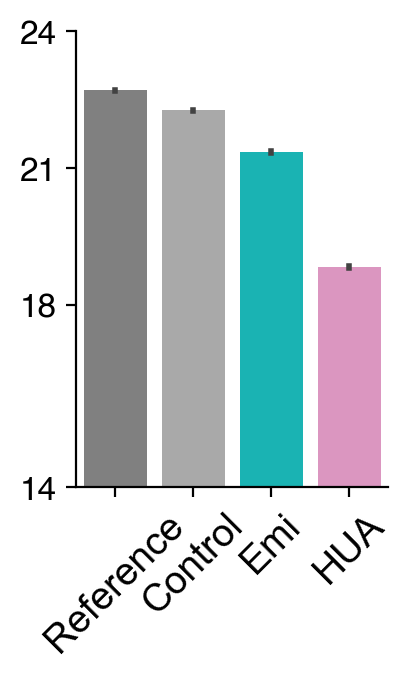

In [ ]:

emi_color = '#00cdcd'
hua_color = '#e78ac3'
ctrl_color = '#A9A9A9'

pl.figure(figsize = (2,3))
sn.barplot(tidy_tp_pd, y='Tp', x = 'Condition', errorbar = 'se' ,errwidth = 2,
           palette = {'Reference':'grey','Control':ctrl_color,
                      'Emi': emi_color, 'HUA':hua_color})
pl.grid(False)

pl.yticks([14,18,21,24], fontname = 'Helvetica', fontsize = 12)
pl.xticks(rotation = 45, label = [])
pl.ylim((14,24))
sn.despine()
pl.xlabel(None)
pl.ylabel(None)

pl.savefig("../../../figures/23-01-16_average_time.pdf", bbox_inches='tight', dpi = 300)


## Find average time for each cell type

In [ ]:
# indices for each cell state
state_ix_c = pd.DataFrame(np.array(adata24c.obs.cell_states)).groupby(0).groups
state_ix_h = pd.DataFrame(np.array(adata24h.obs.cell_states)).groupby(0).groups
state_ix_e = pd.DataFrame(np.array(adata24e.obs.cell_states)).groupby(0).groups

In [ ]:
# distribution of time point assignmet for each state

states_dist_c = {}
for states in state_ix_c.keys():
    time_temp = []
    for time_states in states24c[state_ix_c[states]]:
        time_temp=time_temp+[time_states[:2]]
    states_dist_c[states] = np.array(time_temp).astype(float)
    
states_dist_h = {}
for states in state_ix_h.keys():
    time_temp = []
    for time_states in states24h[state_ix_h[states]]:
        time_temp=time_temp+[time_states[:2]]
    states_dist_h[states] = np.array(time_temp).astype(float)
    
states_dist_e = {}
for states in state_ix_e.keys():
    time_temp = []
    for time_states in states24e[state_ix_e[states]]:
        time_temp=time_temp+[time_states[:2]]
    states_dist_e[states] = np.array(time_temp).astype(float)

In [ ]:
# avg time and mean sem for each state:

# control
avg_time_24c = {}
sem_time_24c = {}
for k,v in states_dist_c.items():
    avg_time_24c[k]=  v.mean()
    sem_time_24c[k] = ss.sem(v)
avg_time_24c = pd.Series(avg_time_24c)
sem_time_24c = pd.Series(sem_time_24c)

# HUA
avg_time_24h = {}
sem_time_24h = {}
for k,v in states_dist_h.items():
    avg_time_24h[k]=  v.mean()
    sem_time_24h[k] = ss.sem(v)
avg_time_24h  = pd.Series(avg_time_24h)
sem_time_24h = pd.Series(sem_time_24h)

# Emi
avg_time_24e = {}
sem_time_24e = {}
for k,v in states_dist_e.items():
    avg_time_24e[k]=  v.mean()
    sem_time_24e[k] = ss.sem(v)
        
avg_time_24e = pd.Series(avg_time_24e)
sem_time_24e = pd.Series(sem_time_24e)


In [ ]:
# statistical significance:

# control
avg_time_24c = {}
sem_time_24c = {}
for k,v in states_dist_c.items():
    avg_time_24c[k]=  v.mean()
    sem_time_24c[k] = ss.sem(v)
avg_time_24c = pd.Series(avg_time_24c)
sem_time_24c = pd.Series(sem_time_24c)

In [ ]:
pval_hua = {}
for k in states_dist_c.keys():
    pval_hua[k] = ss.ranksums(states_dist_c[k],states_dist_h[k], alternative='greater')[1]

# Plot data

In [ ]:
state_order_to_plot = (avg_time_24c-avg_time_24h).sort_values().index

In [ ]:
state_order_to_plot

Index(['Endodermal: pancreatic', 'Germline', 'Ionocyte',
       'Retinal pigmented epithelium', 'Muscle/myotome 3', 'Cardiac muscle 1',
       'Proctodeum', 'Endodermal: pharyngeal pouch', 'Cardiac muscle 2',
       'Endothelial', 'Roofplate', 'Differentiating neurons',
       'Pharyngeal arch', 'Periderm', 'Muscle/myotome 1', 'Pectoral fin bud',
       'Otic placode', 'Forebrain', 'Floorplate', 'Epidermal other',
       'Endodermal lining', 'Rohon-Beard neurons', 'Notochord', 'Midbrain',
       'Pronephros', 'Neutrophil', 'Spinal cord', 'Neural crest',
       'Hatching gland', 'Lens', 'Hindbrain', 'Sclerotome', 'Muscle/myotome 2',
       'Monocytic', 'Erythroid', 'Optic cup', 'Presomitic mesoderm'],
      dtype='object')

In [ ]:
state_labels = ['Pancreatic', 'Ionocyte', 'Germline', 'Slow muscle',
       'Pharyngeal pouch', 'Cardiac muscle 1', 'Cardiac muscle 2',
       'Proctodeum', 'Myotome', 'Retinal pigmented epithelium',
       'Endothelial', 'Roofplate', 'Otic placode', 'Pharyngeal arch',
       'Differentiating neurons', 'Forebrain', 'Pectoral fin bud', 'Periderm',
       'Floorplate', 'Endodermal lining', 'Epidermal other',
       'Rohon-Beard neurons', 'Notochord', 'Neural crest', 'Pronephros',
       'Spinal cord', 'Midbrain', 'Sclerotome', 'Fast muscle',
       'Neutrophil', 'Hindbrain', 'Lens', 'Hatching gland',
       'Presomitic mesoderm', 'Monocytic', 'Optic cup', 'Erythroid']

In [38]:
# find sem of for delta time:

sem_delta_h = np.sqrt(sem_time_24h**2 + sem_time_24c**2)

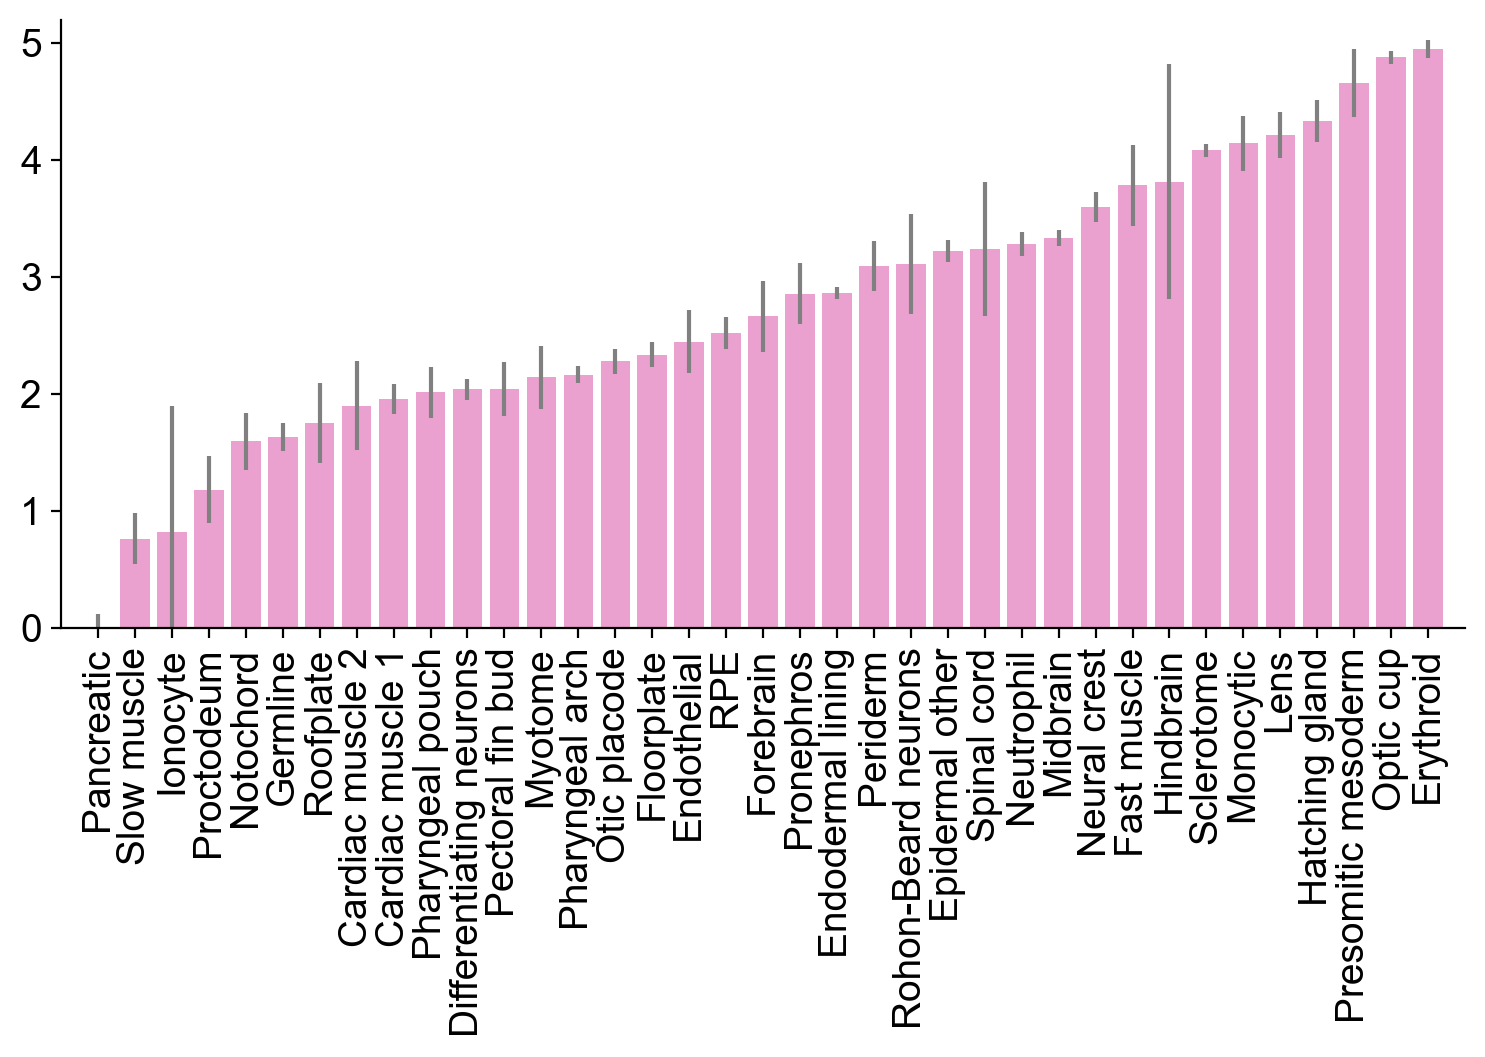

In [39]:
# plot delta time for cell states

pl.figure(figsize = (9,4))

pl.bar(np.arange(avg_time_24h.shape[0]), (avg_time_24c-avg_time_24h)[state_order_to_plot], 
       yerr = sem_delta_h[state_order_to_plot], 
       color = hua_color, alpha = 0.8 , ecolor = 'grey')

bla = pl.xticks(np.arange(avg_time_24c.shape[0]),
                labels = state_labels, rotation = 90)


pl.grid(False)
sn.despine()
pl.ylim(0,5.2)
pl.xlim(-1,37)
pl.savefig("../../../figures/23-01-26_delta_infered_time_hua.pdf", bbox_inches='tight', dpi = 300)


# Get votes of states in a lineage for tree plot

In [ ]:
all_states = np.array(list(set(states_indrops4c)))
all_states.sort()

In [ ]:
vote_dataframe = pd.DataFrame( np.zeros((len(set(states_indrops4c)),4)) )  
vote_dataframe.index = all_states
vote_dataframe.columns = ['Ref', 'Control', 'HUA', 'emi1']


In [ ]:
vote_dataframe['Ref'] = pd.Series(Counter(states24ref))/len(states24ref)
vote_dataframe['Control'] = pd.Series(Counter(states24c))/len(states24c)
vote_dataframe['HUA'] = pd.Series(Counter(states24h))/len(states24h)
vote_dataframe['emi1'] = pd.Series(Counter(states24e))/len(states24e)

In [ ]:
vote_dataframe2 = pd.DataFrame( np.zeros((len(set(states_indrops4c)),2)) )  
vote_dataframe2.index = all_states
vote_dataframe2.columns = ['Control', 'HUA']

vote_dataframe2['Control'] = pd.Series(Counter(states24c))/len(states24c)
vote_dataframe2['HUA'] = pd.Series(Counter(states24h))/len(states24h)

In [ ]:
vote_dataframe = vote_dataframe.fillna(0) 
vote_dataframe2 = vote_dataframe2.fillna(0) 

In [ ]:
vote_dataframe2

,Control,HUA
14-Blood island,0.000072,0.000529
14-Differentiating neurons,0.000976,0.002285
14-Endodermal lining,0.002278,0.006828
14-Endothelial,0.000235,0.002954
14-Epidermal foxi3a,0.000253,0.000446
...,...,...
24-Retinal pigmented epithelium,0.004303,0.001170
24-Rohon-Beard neurons,0.005659,0.003790
24-Roofplate,0.002965,0.002815
24-Sclerotome,0.019852,0.011593
